In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
import random
%matplotlib inline
import os
os.chdir(r"C:\\Users\2112161\\OneDrive - Cognizant\Desktop\\DATA\\New folder\\scripsts python")
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostRegressor,AdaBoostClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRegressor,XGBRFClassifier,XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,mean_absolute_error,mean_squared_error,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline,Pipeline


video https://www.youtube.com/watch?v=aUnNWZorGmk&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=35

##### 1.CCA or complete case analysis(Dropna()) 
a.apply this only when data is MCAR(missing completely at random)
b.apply this only when general any columns has <5% missing data or >=95% missing data(here u can remove column)

In [131]:
df= pd.read_csv('jobs.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [39]:
df.isnull().mean()*100#percentage of values missing

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [40]:
remcol=[x for x in df.columns if df[x].isnull().mean()<0.05 and df[x].isnull().mean()>0 ]
remcol#as expected above

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [41]:
df.sample(4)#sample func randomly

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
121,13915,city_16,0.910,Male,Has relevent experience,no_enrollment,Phd,STEM,20.0,100-500,Pvt Ltd,20.0,1.0
7715,5383,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,1000-4999,Pvt Ltd,22.0,0.0
2868,9374,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,1000-4999,Pvt Ltd,55.0,0.0
17165,7473,city_100,0.887,Male,Has relevent experience,Full time course,Graduate,STEM,5.0,10/49,Public Sector,34.0,0.0


In [47]:
#before dropping check how much loss to data
len(df[remcol].dropna())/ len(df)#so when u remove those columns above we will 89 % of data thats ok

0.8968577095730244

In [48]:
df.shape,df[remcol].dropna().shape

((19158, 13), (17182, 5))

In [49]:
newdf=df[remcol].dropna()
newdf

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


<AxesSubplot:>

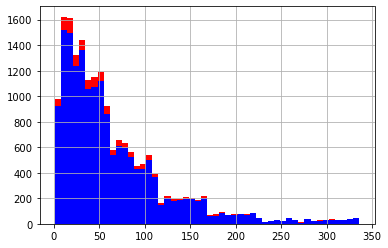

In [62]:
#also check if before and after changinf distribution is same or not or check if there they are comparable(less data loss)

df.training_hours.hist(bins=50,color='red')
newdf.training_hours.hist(bins=50,color='blue')
#not much loss

<AxesSubplot:>

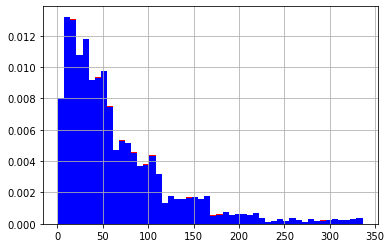

In [61]:
df.training_hours.hist(bins=50,color='red',density=True)
newdf.training_hours.hist(bins=50,color='blue',density=True)
#now see neglible change in distribution less red color see

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

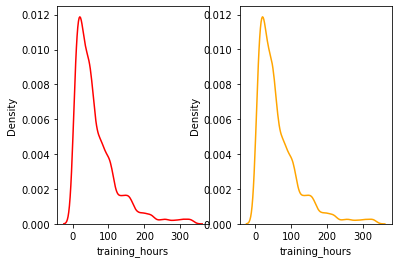

In [71]:
plt.subplot(1,2,1)
sns.kdeplot(df.training_hours,color='red')
plt.subplot(1,2,2)
sns.kdeplot(newdf.training_hours,color='orange')#same plot

<AxesSubplot:ylabel='Density'>

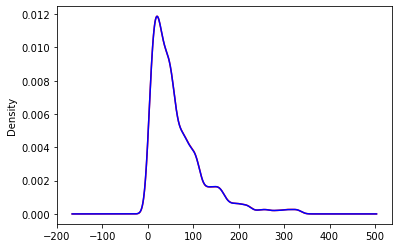

In [78]:
df.training_hours.plot.density(color='red')
newdf.training_hours.plot.density(color='blue')#its overallping so cant see red one which means no change in distribution
#this also show MCAR condn is satisifed

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

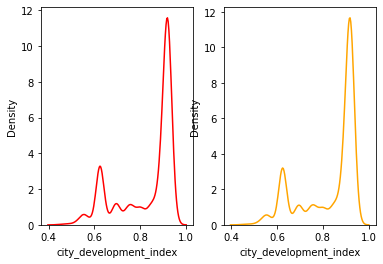

In [83]:
#now check for other columns
plt.subplot(1,2,1)
sns.kdeplot(df.city_development_index,color='red')
plt.subplot(1,2,2)
sns.kdeplot(newdf.city_development_index,color='orange')


<AxesSubplot:ylabel='Density'>

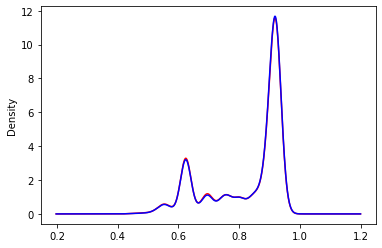

In [81]:
df.city_development_index.plot.density(color='red')
newdf.city_development_index.plot.density(color='blue')#overlapping

<AxesSubplot:>

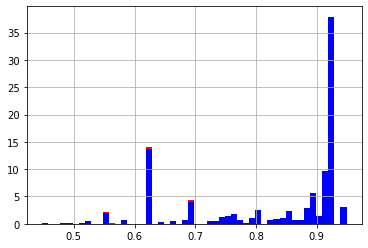

In [82]:
df. city_development_index.hist(bins=50,color='red',density=True)
newdf.city_development_index.hist(bins=50,color='blue',density=True)
#now see neglible change in distribution less red color see

<AxesSubplot:>

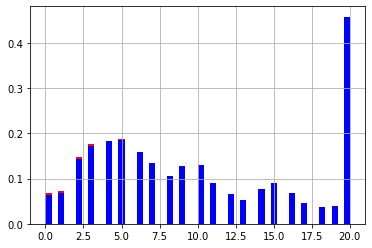

In [84]:
df.experience.hist(bins=50,color='red',density=True)
newdf.experience.hist(bins=50,color='blue',density=True)
#now see neglible change in distribution less red color see

<AxesSubplot:ylabel='Density'>

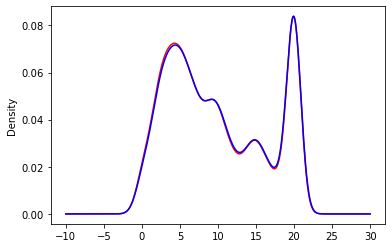

In [85]:
df.experience.plot.density(color='red')
newdf.experience.plot.density(color='blue')#overlapping

enrolled_university and education leve is cat others above are numerical
for this we need to check before and after removing ratio of the data is same


In [90]:
df.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [91]:
newdf.enrolled_university.value_counts()

no_enrollment       12632
Full time course     3449
Part time course     1101
Name: enrolled_university, dtype: int64

In [95]:
df.enrolled_university.value_counts()/len(df)

no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
Name: enrolled_university, dtype: float64

In [94]:
newdf.enrolled_university.value_counts()/len(newdf)

no_enrollment       0.735188
Full time course    0.200733
Part time course    0.064079
Name: enrolled_university, dtype: float64

In [103]:
t=pd.concat([pd.DataFrame(df.enrolled_university.value_counts()/len(df)),pd.DataFrame(newdf.enrolled_university.value_counts()/len(newdf))],axis=1)
t

,enrolled_university,enrolled_university
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [105]:
t.columns=['original','afterCCA']
t#ratio almost same

,original,afterCCA
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


#when u deploy model in prod the model wont know hot to handle missing values so we either fill those missing values
generally we dont do CCA due to this
#so we go imputer filling null values with mean,median etc(imputation technique-replacing null values)

In [132]:
new=df.copy()
new.city_development_index.fillna(value=np.mean(df.city_development_index),inplace=True)#like this is univariate analysis replace a miss val in a col using
#the non null values in that col

In [133]:
new.city_development_index.isnull().sum()

0

#### replace mean/median when null vales <5% and has MCAR
#### replace mean when data has normal dist if skewed use median(pref)

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

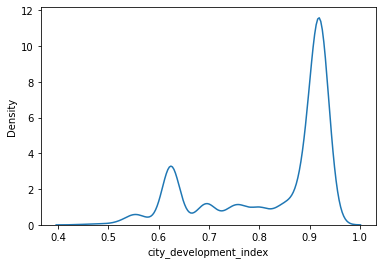

In [119]:
new=df.copy()
sns.kdeplot(new.city_development_index)#skewed

In [122]:
new.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [123]:
#imputer
data=pd.read_csv('toy.csv')
data

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [179]:
d1=data.copy()
d1

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [180]:
d1.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [181]:
#so <5% is fare but we'll check if we take>5% wat happens
d1['agemean']=d1.Age.fillna(value=d1.Age.mean())
d1['agemedian']=d1.Age.fillna(value=d1.Age.median()) # np.median(d1.Age) is resulting in null
d1

,Age,Fare,Family,Survived,agemean,agemedian
0,22.0,7.2500,1,0,22.000000,22.0
1,38.0,71.2833,1,1,38.000000,38.0
2,26.0,7.9250,0,1,26.000000,26.0
3,35.0,53.1000,1,1,35.000000,35.0
4,35.0,8.0500,0,0,35.000000,35.0
...,...,...,...,...,...,...
886,27.0,13.0000,0,0,27.000000,27.0
887,19.0,30.0000,0,1,19.000000,19.0
888,NaN,23.4500,3,0,29.699118,28.0
889,26.0,NaN,0,1,26.000000,26.0


<AxesSubplot:ylabel='Density'>

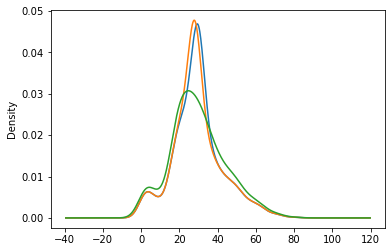

In [182]:
d1.agemean.plot.density()
d1.agemedian.plot.density()
d1.Age.plot.density()#so there significant diff in Age orig so done impute age i.e >5%

<AxesSubplot:ylabel='Density'>

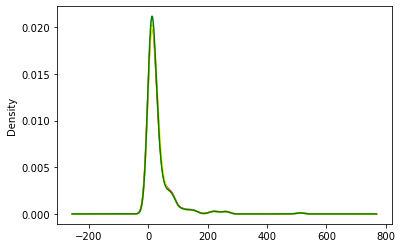

In [183]:
d1['faremean']=d1.Fare.fillna(value=d1.Fare.mean())
d1['faremedian']=d1.Fare.fillna(value=d1.Fare.median())
d1.Fare.plot.density(color='red')
d1.faremean.plot.density(color='yellow')
d1.faremedian.plot.density(color='green')#not much change so we can impute far

In [184]:
#also note  when imputing make sure that new var is not that far from orig var
for i in [d1.Age.var(),
d1.agemean.var(),
d1.agemedian.var(),
          d1.Fare.var(),
d1.faremean.var(),
d1.faremedian.var()]:
    print(i)
#see between age agemean age median there a lot diff so dont imput them

211.0191247463081
169.05239993721085
169.51249827942328
2530.6730768999487
2402.717696607255
2417.971599672526


In [172]:
(211-169)/211 #here close to 20% change so not good

0.1990521327014218

In [186]:
(2530.6730768999487-2417.971599672526)/2530.6730768999487#see fare 4% change only 

0.044534190629427775

In [189]:
d1.cov()#see there chage in cov btw Age and Fare which is 78 and Fare and agemean is 65(reduced) so cov shud not change much

,Age,Fare,Family,Survived,agemean,agemedian,faremean,faremedian
Age,211.019125,78.071438,-6.507525,-0.551296,211.019125,211.019125,73.727862,73.196997
Fare,78.071438,2530.673077,17.460363,6.442361,62.210610,65.546143,2530.673077,2530.673077
Family,-6.507525,17.460363,2.603248,0.013063,-5.213332,-5.159658,16.577535,16.611725
Survived,-0.551296,6.442361,0.013063,0.236772,-0.441656,-0.411226,6.116624,6.021945
agemean,211.019125,62.210610,-5.213332,-0.441656,169.052400,169.052400,59.065130,58.639842
agemedian,211.019125,65.546143,-5.159658,-0.411226,169.052400,169.512498,62.232012,61.706696
faremean,73.727862,2530.673077,16.577535,6.116624,59.065130,62.232012,2402.717697,2402.717697
faremedian,73.196997,2530.673077,16.611725,6.021945,58.639842,61.706696,2402.717697,2417.971600


In [190]:
d1.corr()#same goes with correlation

,Age,Fare,Family,Survived,agemean,agemedian,faremean,faremedian
Age,1.000000,0.099481,-0.301914,-0.077221,1.000000,1.000000,0.097273,0.096203
Fare,0.099481,1.000000,0.212626,0.263920,0.094681,0.099626,1.000000,1.000000
Family,-0.301914,0.212626,1.000000,0.016639,-0.248512,-0.245619,0.209609,0.209378
Survived,-0.077221,0.263920,0.016639,1.000000,-0.069809,-0.064910,0.256445,0.251678
agemean,1.000000,0.094681,-0.248512,-0.069809,1.000000,0.998642,0.092676,0.091718
agemedian,1.000000,0.099626,-0.245619,-0.064910,0.998642,1.000000,0.097513,0.096384
faremean,0.097273,1.000000,0.209609,0.256445,0.092676,0.097513,1.000000,0.996841
faremedian,0.096203,1.000000,0.209378,0.251678,0.091718,0.096384,0.996841,1.000000


<AxesSubplot:>

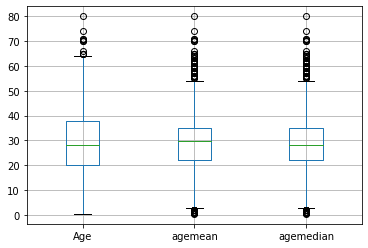

In [196]:
d1.boxplot(['Age','agemean','agemedian'])#so mean and median in age brought in more outlier so bad for acuuracy and model

<AxesSubplot:>

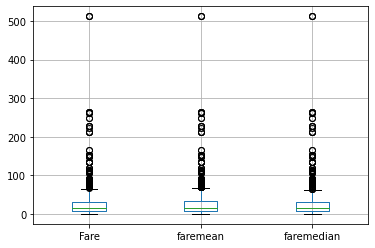

In [197]:
d1.boxplot(['Fare','faremean','faremedian'])#fare didnt bring any oxtra outliers

In [198]:
#using sklearn refer video
#lets see how to replace mssing values in cat feature

##### same as CCA but it must MCAR and less than 5% then replace by mode
For >5%  and not MCAR jus replace missing values by 'missing' word
for <5% use frequent value inputation(like MCAR) fillna with mode eg.see below and replace by mode of feature but not the mode of that column>>other categories

In [200]:
df = pd.read_csv('train1.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [201]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

In [202]:
df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

<AxesSubplot:>

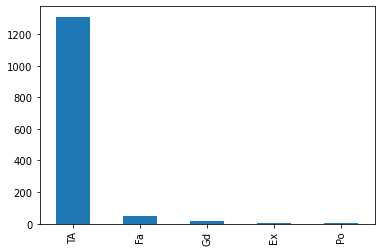

In [203]:
df.GarageQual.value_counts().plot(kind='bar')

In [204]:
df.GarageQual.mode()#TA is most frequent

0    TA
dtype: object

In [205]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


<AxesSubplot:ylabel='Density'>

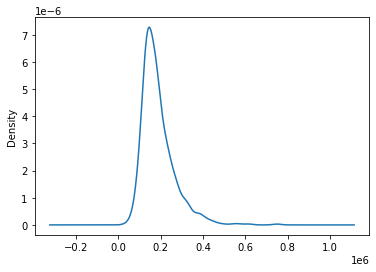

In [217]:
df[df.GarageQual=='TA']['SalePrice'].plot.density()


In [216]:
df[df.GarageQual.isnull()

,FireplaceQu,GarageQual,SalePrice
39,NaN,NaN,82000
48,NaN,NaN,113000
78,NaN,NaN,136500
88,NaN,NaN,85000
89,NaN,NaN,123600
...,...,...,...
1349,NaN,NaN,122000
1407,NaN,NaN,112000
1449,NaN,NaN,92000
1450,NaN,NaN,136000


<AxesSubplot:ylabel='Density'>

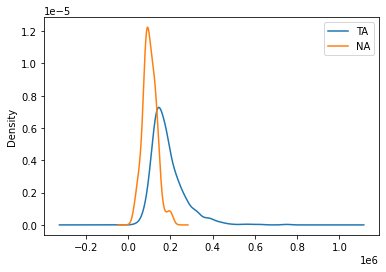

In [235]:
plt.subplot(1,1,1)
df[df.GarageQual=='TA']['SalePrice'].plot.density(label='TA',legend=True)
plt.subplot(1,1,1)
df[df.GarageQual.isnull()]['SalePrice'].plot.density(label='NA',legend=True)
#as u can see salerpcie with NA has higher peak

In [247]:
#lets replace those above null values for salesprice with TA
df1=df.copy()
df1['GarageQual'].fillna('TA',inplace=True)
df1.GarageQual.isnull().sum()

0

<AxesSubplot:>

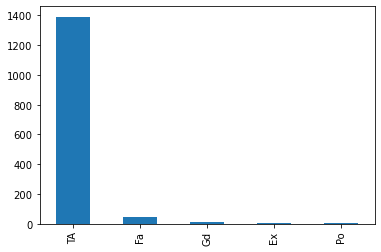

In [249]:
df1.GarageQual.value_counts().plot(kind='bar')#values of TA increased as expected

<AxesSubplot:ylabel='Density'>

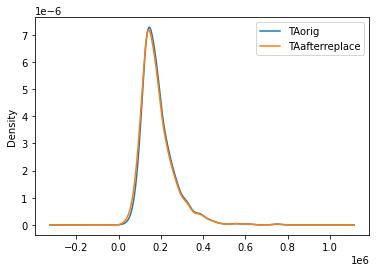

In [257]:
plt.subplot(1,1,1)
df[df.GarageQual=='TA']['SalePrice'].plot.density(label='TAorig',legend=True)
plt.subplot(1,1,1)
df1[df1.GarageQual=='TA']['SalePrice'].plot.density(label='TAafterreplace',legend=True)
#no change in pdf

In [260]:
df.FireplaceQu   #has almost 50% nan

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

<AxesSubplot:>

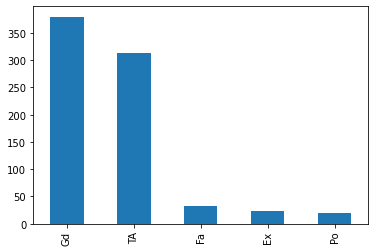

In [263]:
df.FireplaceQu.value_counts().plot(kind='bar')#here gd and ta almost same so shudnt apply MCAR method but lets analysz

In [264]:
df.FireplaceQu.mode()

0    Gd
dtype: object

<AxesSubplot:ylabel='Density'>

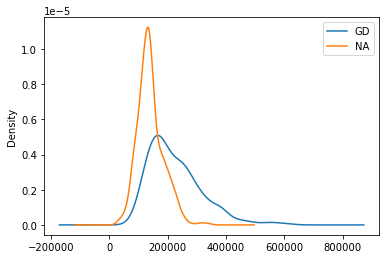

In [274]:
plt.subplot(1,1,1)
df[df.FireplaceQu=='Gd']['SalePrice'].plot.density(label='GD',legend=True)
plt.subplot(1,1,1)
df[df.FireplaceQu.isnull()]['SalePrice'].plot.density(label='NA',legend=True)
#let replace the null values

In [269]:
df2=df.copy()
df2['FireplaceQu'].fillna('Gd',inplace=True)
df2.FireplaceQu.isnull().sum()

0

<AxesSubplot:ylabel='Density'>

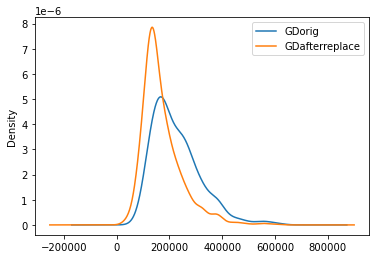

In [275]:
plt.subplot(1,1,1)
df[df.FireplaceQu=='Gd']['SalePrice'].plot.density(label='GDorig',legend=True)
plt.subplot(1,1,1)
df2[df2.FireplaceQu=='Gd']['SalePrice'].plot.density(label='GDafterreplace',legend=True)
#therestill diff it shud nt be like this so dont use MCAR for such features

In [ ]:
#automatic impute selection through sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
log=LogisticRegression()
log

In [ ]:
df = pd.read_csv('covid_patients.csv')
df

In [35]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [38]:
x=df.drop(columns='has_covid')
y=df.iloc[:,-1]
x

,age,gender,fever,cough,city
0,60,Male,103.0,Mild,Kolkata
1,27,Male,100.0,Mild,Delhi
2,42,Male,101.0,Mild,Delhi
3,31,Female,98.0,Mild,Kolkata
4,65,Female,101.0,Mild,Mumbai
...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore
96,51,Female,101.0,Strong,Kolkata
97,20,Female,101.0,Mild,Bangalore
98,5,Female,98.0,Strong,Mumbai


In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)

In [49]:
df.columns

Index(['age', 'gender', 'fever', 'cough', 'city', 'has_covid'], dtype='object')

In [44]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
],remainder='passthrough')
ct=transformer.fit_transform(xtrain)
transformer.transform(xtest).shape

(20, 7)

In [53]:
pd.DataFrame(ct)

,0,1,2,3,4,5,6
0,99.0,0.0,0.0,0.0,0.0,0.0,22.0
1,104.0,1.0,0.0,0.0,0.0,0.0,56.0
2,98.0,0.0,0.0,0.0,1.0,0.0,31.0
3,104.0,1.0,0.0,1.0,0.0,0.0,75.0
4,99.0,0.0,1.0,0.0,0.0,0.0,72.0
...,...,...,...,...,...,...,...
75,101.0,1.0,0.0,0.0,1.0,0.0,51.0
76,99.0,0.0,1.0,0.0,0.0,0.0,65.0
77,104.0,0.0,1.0,0.0,0.0,1.0,42.0
78,104.0,0.0,0.0,0.0,0.0,0.0,18.0


,age,gender,fever,cough,city,has_covid
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
5,84,Female,NaN,Mild,Bangalore,Yes


In [14]:
df1=df.copy()
df1.fever.fillna(df.fever.mean(),inplace=True)
df1.isnull().sum()

age          0
gender       0
fever        0
cough        0
city         0
has_covid    0
dtype: int64

In [30]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}



In [25]:
grid_search = GridSearchCV( estimator=log,param_grid=param_grid, cv=10,verbose=True,n_jobs=-1)

#video
https://www.youtube.com/watch?v=S6hcGwhNbIM&list=PLZoTAELRMXVPwYGE2PXD3x0bfKnR0cJjN&index=8
methods to handle missing values

1 mean/median/mode imputation(only when there is MCAR) and robust to outliers
for numerical use mean/medianmm
for categorical use mode

2.random samples imputation(use when MCAR)(see below titanics dataset) disad of above method is taken care by this method
it picks randome values to fill na values in that col

3.if MNAR then Capturing NAN values with a new feature
disad->curse of dimensionality i.e it add more columns in data if there more cols having null values

4.End of dist imputation
also use when MNAR

5.arbitary imputation replaces arbitrary value instead of nan values
https://www.youtube.com/watch?v=dmt2R4A3W1Q

In [11]:
#random sampling and mean/median sampling
df=pd.read_csv('titanic.csv')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df['Age'].dropna().sample()#every time u run this cell it will change

237    8.0
Name: Age, dtype: float64

In [26]:
df.Age.fillna(int(df['Age'].dropna().sample().values)).isnull().sum()#this wat MCAR random fill na

0

In [59]:
print(df.Age.fillna(int(df['Age'].dropna().sample(random_state=0).values))[5])
print(df.Age.fillna(int(df['Age'].dropna().sample(random_state=0).values)))#here u can see 28 is replace by a random values

28.0
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [72]:
df.Age.dropna().sample(df.Age.isnull().sum(),random_state=0)#to check null values assignment see there are 177 values

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [78]:
def impute_nan(df,col,median):
    df[col+"_median"]=df[col].fillna(median)
    df[col+"_random"]=df[col]
    ##It will have the random sample to fill the na
    random_sample=df[col].dropna().sample(df[col].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[col].isnull()].index
    df.loc[df[col].isnull(),col+'_random']=random_sample

In [79]:
impute_nan(df,'Age',df.Age.median())

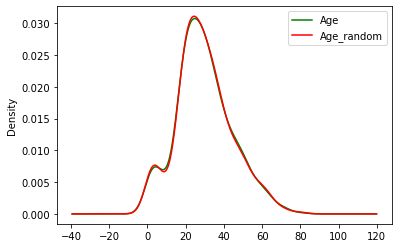

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax,color='green')
#df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') #here age and age random are overlapping means no issue in using random sampling

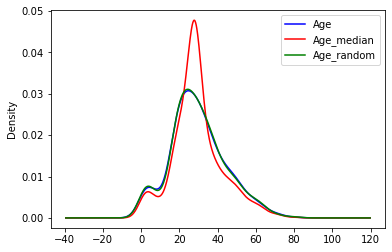

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax,color='blue')
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') #here age and age random are overlapping means no issue in using random sampling

In [90]:
#3. capture nan with new feature
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [91]:
df['agenan']=np.where(df.Age.isnull(),1,0)
df
#then u can replace nan with mean or median like df.age.fillna(median)

,Survived,Age,Fare,agenan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


<AxesSubplot:>

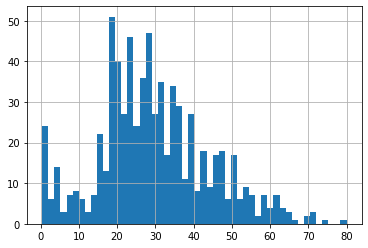

In [93]:
#end of dist
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.Age.hist(bins=50)

In [105]:
df.Age.mean()+ 3*df.Age.std()

73.27860964406095

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

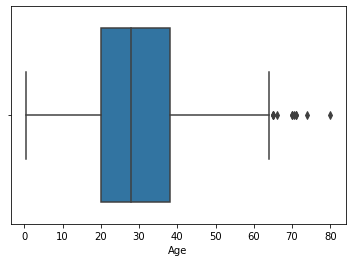

In [106]:
sns.boxplot(df.Age,data=df)#that y above we took right side outlier not left side

In [107]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)#filling null with median

In [109]:
extreme=df.Age.mean()+3*df.Age.std()
impute_nan(df,'Age',df.Age.median(),extreme)

In [112]:
df

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


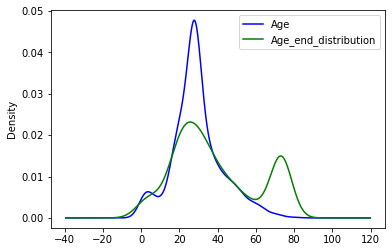

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax,color='blue')
df.Age_end_distribution.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') #huge change

<AxesSubplot:>

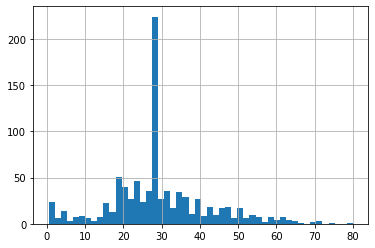

In [115]:
df.Age.hist(bins=50)

<AxesSubplot:>

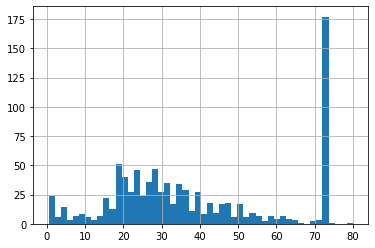

In [116]:
df.Age_end_distribution.hist(bins=50)

C:\Users\2112161\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

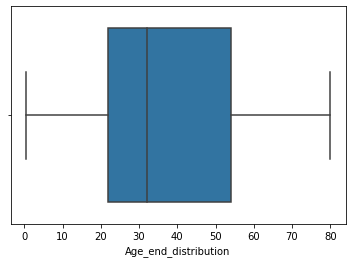

In [117]:
sns.boxplot(df.Age_end_distribution)#no outlier after eodist

In [279]:
#arbitrary imputation
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.isnull().sum()
#here we can replace nan with values outlier values i.e more than or equal to highest outlier or less than or equal ot  small outliers

Survived      0
Age         177
Fare          0
dtype: int64

<AxesSubplot:>

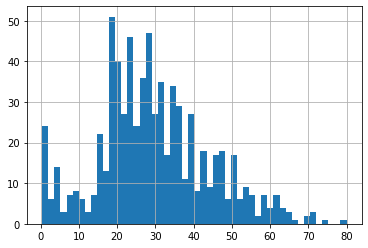

In [280]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)#small outlie
    df[variable+'_hundred']=df[variable].fillna(100)#more than outlier

df['Age'].hist(bins=50)

#handling categorial feature
1

In [191]:
#pipeline concept

transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [68]:
dd=pd.read_csv('Social_Network_Ads.csv').drop(columns='User ID')
ct1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0])],remainder='passthrough')
ct2=ColumnTransformer(transformers=[('scale',StandardScaler(),[1,2])],remainder='passthrough')
rf=RandomForestClassifier()

In [69]:
xtrain,xtest,ytrain,ytest = train_test_split(dd.drop(columns=['Purchased']),
                                                 dd['Purchased'],
                                                 test_size=0.2,
                                                random_state=0)

In [84]:
pipe=Pipeline([('c1',ct1),('ct2'),('algo',rf)])

In [ ]:
pipe.fit((xtrain,ytrain))#getting error dont know why

In [71]:
#another syntax
mp=make_pipeline(ct1,ct2,rf)#use this

In [72]:
mp.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  [1, 2])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [28]:
mp.steps

[('columntransformer-1',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('ohe',
                                   OneHotEncoder(drop='first', sparse=False),
                                   [0])])),
 ('columntransformer-2',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('scale', StandardScaler(), [1, 2])])),
 ('randomforestclassifier', RandomForestClassifier())]

In [29]:
ypr=mp.predict(xtest)
accuracy_score(ypr,ytest)

0.9375

In [87]:
#grid cv
param = {
    "randomforestclassifier__max_depth":[np.arange(20),None]
}
gcv = GridSearchCV(mp, params, cv=5, scoring='accuracy')
gcv.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer-1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         [0])])),
                                       ('columntransformer-2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scale',
                                                                         StandardScaler(),
                                                                         [1,
                                                                          2])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [1, 2, 3, 4, 5,
                                                               None]},
             scoring='accuracy')

In [81]:
gcv.best_score_

0.909375

In [82]:
gcv.best_params_

{'randomforestclassifier__max_depth': 5}

In [89]:
cross_val_score(mp,xtrain,ytrain,cv=5,scoring='accuracy')

array([0.875   , 0.859375, 0.890625, 0.90625 , 0.953125])

In [107]:
#another way to make pipeline for multiple models
p1=Pipeline([('ohe',OneHotEncoder()),('scale',StandardScaler(with_mean=False)),('log',LogisticRegression())])
p2=Pipeline([('ohe',OneHotEncoder()),('scale',StandardScaler(with_mean=False)),('rf',RandomForestClassifier())])
p3=Pipeline([('ohe',OneHotEncoder()),('scale',StandardScaler(with_mean=False)),('adb',AdaBoostClassifier())])

In [110]:
pipes=[p1,p2,p3]

In [102]:
for i in enumerate(['a','b','c']):
    print(i)

(0, 'a')
(1, 'b')
(2, 'c')


In [111]:
for i in enumerate(pipes):
    print(i)

(0, Pipeline(steps=[('ohe', OneHotEncoder()),
                ('scale', StandardScaler(with_mean=False)),
                ('log', LogisticRegression())]))
(1, Pipeline(steps=[('ohe', OneHotEncoder()),
                ('scale', StandardScaler(with_mean=False)),
                ('rf', RandomForestClassifier())]))
(2, Pipeline(steps=[('ohe', OneHotEncoder()),
                ('scale', StandardScaler(with_mean=False)),
                ('adb', AdaBoostClassifier())]))


In [120]:
p1.fit(xtrain,ytrain)

Pipeline(steps=[('ohe', OneHotEncoder()),
                ('scale', StandardScaler(with_mean=False)),
                ('log', LogisticRegression())])

In [116]:
for i in pipes:
    i.fit(xtrain,ytrain)

In [ ]:
pipe_dict = {0: 'Logistic Regression', 1: 'RandomForestClassifier', 2: 'AdaBoostClassifier'}
for i,model in enumerate(pipes):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(xtest,ytest)))

In [129]:
p1.fit(xtrain,ytrain)
p2.fit(xtrain,ytrain)
p3.fit(xtrain,ytrain)

Pipeline(steps=[('ohe', OneHotEncoder()),
                ('scale', StandardScaler(with_mean=False)),
                ('adb', AdaBoostClassifier())])

In [131]:
p1.predict(xtest)#getting error for above data set dont know why

ValueError: Found unknown categories [77000, 99000, 105000, 115000] in column 2 during transform

In [138]:
data=sns.load_dataset('iris')
data['species']=LabelEncoder().fit_transform(data[['species']])
data

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [150]:
x=data.iloc[:,:-1]
y=pd.DataFrame(data.iloc[:,-1])
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,
                                                random_state=0)

In [151]:
p1=Pipeline([('scale',StandardScaler(with_mean=False)),('log',LogisticRegression())])
p2=Pipeline([('scale',StandardScaler(with_mean=False)),('rf',RandomForestClassifier())])
p3=Pipeline([('scale',StandardScaler(with_mean=False)),('adb',AdaBoostClassifier())])
pipes=[p1,p2,p3]
for i in pipes:
    i.fit(xtrain,ytrain)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using 

In [152]:
for i in pipes:
    i.fit(xtrain,ytrain)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using 

In [153]:
pipe_dict = {0: 'Logistic Regression', 1: 'RandomForestClassifier', 2: 'AdaBoostClassifier'}
for i,model in enumerate(pipes):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(xtest,ytest)))

Logistic Regression Test Accuracy: 1.0
RandomForestClassifier Test Accuracy: 0.9666666666666667
AdaBoostClassifier Test Accuracy: 0.9666666666666667


In [3]:
dd=pd.read_csv('Social_Network_Ads.csv')
dd.drop(columns=['User ID'],inplace=True)
dd

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [4]:
#column transformer and pipeline combo
xtrain,xtest,ytrain,ytest = train_test_split(dd.drop(columns=['Purchased']),
                                                 dd['Purchased'],
                                                 test_size=0.2,
                                                random_state=0)

In [5]:
dd.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
catfea=[fea for fea in dd.columns if dd[fea].dtypes=='O' ]
numfea=[fea for fea in dd.columns if dd[fea].dtypes=='int64' and fea!='Purchased']
numfea

['Age', 'EstimatedSalary']

In [8]:
pipnum=Pipeline([('imputenum',SimpleImputer(strategy='mean')),
                 ('Scalenum',StandardScaler())
                ])

pipcat=Pipeline([('imputecat',SimpleImputer(strategy='most_frequent')),
                 ('ohe',OneHotEncoder(sparse=False))
                ])

In [9]:
#use this apporach refer https://www.youtube.com/watch?v=a6o9ies85eM
ct=ColumnTransformer(transformers=[
    ('numtfr',pipnum,numfea),
    ('cattrf',pipcat,catfea),
    ],remainder='passthrough')

In [14]:
xtrain

,Gender,Age,EstimatedSalary
336,Male,58,144000
64,Female,59,83000
55,Female,24,55000
106,Female,26,35000
300,Female,58,38000
...,...,...,...
323,Female,48,30000
192,Male,29,43000
117,Male,36,52000
47,Female,27,54000


In [13]:
pd.DataFrame(ct.fit_transform(xtrain))

,0,1,2,3
0,1.922950,2.146016,0.0,1.0
1,2.020161,0.378719,1.0,0.0
2,-1.382215,-0.432499,1.0,0.0
3,-1.187794,-1.011940,1.0,0.0
4,1.922950,-0.925024,1.0,0.0
...,...,...,...,...
315,0.950843,-1.156800,1.0,0.0
316,-0.896162,-0.780164,0.0,1.0
317,-0.215686,-0.519415,0.0,1.0
318,-1.090583,-0.461471,1.0,0.0


after above u can do
final pip=Pipeline([('preproc',ct),
                   ('clas',LogisticRegression())
                   ])
         but instead i did this

In [11]:
xtrainnew=pd.DataFrame(ct.fit_transform(xtrain))
xtestnew=pd.DataFrame(ct.transform(xtest))
xtrainnew


,0,1,2,3
0,1.922950,2.146016,0.0,1.0
1,2.020161,0.378719,1.0,0.0
2,-1.382215,-0.432499,1.0,0.0
3,-1.187794,-1.011940,1.0,0.0
4,1.922950,-0.925024,1.0,0.0
...,...,...,...,...
315,0.950843,-1.156800,1.0,0.0
316,-0.896162,-0.780164,0.0,1.0
317,-0.215686,-0.519415,0.0,1.0
318,-1.090583,-0.461471,1.0,0.0


In [238]:
p1=Pipeline([('log',LogisticRegression())])
p2=Pipeline([('xgb',XGBClassifier())])
p3=Pipeline([('adb',AdaBoostClassifier())])
p4=Pipeline([('rf',RandomForestClassifier())])

In [220]:
pipes=[p1,p2,p3,p4]
for i in pipes:
    i.fit(xtrainnew,ytrain)

In [224]:
pipe_dict = {0: 'Logistic Regression', 1: 'XGBoost', 2: 'AdaBoostClassifier',3:'Randomforest'}
for i,model in enumerate(pipes):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(xtestnew,ytest)))

Logistic Regression Test Accuracy: 0.9125
XGBoost Test Accuracy: 0.925
AdaBoostClassifier Test Accuracy: 0.925
Randomforest Test Accuracy: 0.9375


In [261]:
#another way
p1=Pipeline([('ctr1',ct),('model1',LogisticRegression())])
p2=Pipeline([('ctr2',ct),('model2',XGBClassifier())])
p3=Pipeline([('ctr3',ct),('model3',AdaBoostClassifier())])
p4=Pipeline([('ctr4',ct),('model4',RandomForestClassifier())])
p5=Pipeline([('ctr5',ct),('model5',GradientBoostingClassifier())])

pipes=[p1,p2,p3,p4,p5]
for i in pipes:
    i.fit(xtrain,ytrain)
    
pipe_dict = {0: 'Logistic Regression', 1: 'XGBoost', 2: 'AdaBoostClassifier',3:'Randomforest',4:'gradientboost'}
for i,model in enumerate(pipes):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(xtest,ytest)))

Logistic Regression Test Accuracy: 0.9125
XGBoost Test Accuracy: 0.925
AdaBoostClassifier Test Accuracy: 0.925
Randomforest Test Accuracy: 0.925
gradientboost Test Accuracy: 0.925


In [277]:
pipes=[p1,p2,p3,p4,p5]
p1.named_steps['ctr1']

ColumnTransformer(remainder='passthrough',
                  transformers=[('numtfr',
                                 Pipeline(steps=[('imputenum', SimpleImputer()),
                                                 ('Scalenum',
                                                  StandardScaler())]),
                                 ['Age', 'EstimatedSalary']),
                                ('cattrf',
                                 Pipeline(steps=[('imputecat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(sparse=False))]),
                                 ['Gender'])])

In [230]:
#how to use gridcv for this pipeline doubt
pipe = Pipeline([("classifier", RandomForestClassifier())])
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]

gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(xtrainnew,ytrain)

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self

In [234]:
best_model.best_estimator_,best_model.best_score_

(Pipeline(steps=[('classifier',
                  RandomForestClassifier(max_depth=30, max_leaf_nodes=5,
                                         n_estimators=10))]),
 0.9125)